<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Pivot_points_POLY_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Imports

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install yfinance
#!conda install -c ranaroussi yfinance --y
import yfinance as yf # requires yfinance - pip install yfinance
clear_output()

In [4]:
!pip install backtesting
clear_output()

# Библиоетки backtesting
from backtesting import Backtest, Strategy

In [5]:
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_n_short_strategy.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_strategy.py
clear_output()
    
# Библиотеки из ai_tr_libs
from Long_n_short_strategy import Long_n_Short_Strategy as LnS
from Long_strategy import Long_Strategy as LS

# 1d: counter_lvl = 2

## Загружаем данные

In [16]:
# Начните с активации обходного пути Yahoo Finance и установки начальной и конечной точек фрейма данных.
# здесь Yf.pdr_override () активирует ваши условия обходного пути, а остальное установит ваш фрейм данных.
yf.pdr_override()
start = dt.datetime(2020,1, 1)
now = dt.datetime.now()
interval = '1d'
stock = 'POLY.ME'

buy_signals = pd.DataFrame() # dataframe для записи сигналов
sell_signals = pd.DataFrame() # dataframe для записи сигналов

In [17]:
df = pdr.get_data_yahoo(stock,
                        start,
                        now,
                        interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
del df['Adj Close'], df['Volume']
df.index.name = 'Date'
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-03,978.400024,989.299988,967.099976,989.299988
2020-01-06,995.599976,1004.700012,993.299988,1002.900024
2020-01-08,1008.799988,1016.099976,970.400024,974.099976
2020-01-09,972.799988,972.799988,943.000000,968.900024
2020-01-10,968.900024,989.000000,955.000000,981.000000
...,...,...,...,...
2021-05-20,1757.000000,1794.000000,1754.900024,1788.099976
2021-05-21,1793.000000,1801.500000,1764.599976,1772.000000
2021-05-24,1788.800049,1798.000000,1777.699951,1782.599976


## Разметка Y

In [18]:
from markup_y import SELL, BUY

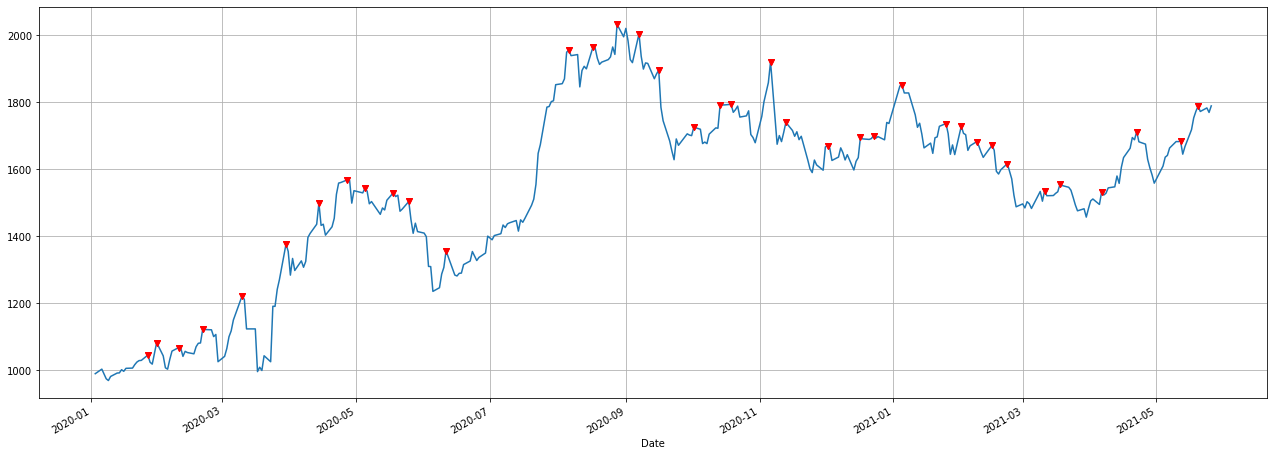

In [19]:
sell_signals = SELL(df, counter_lvl = 2)
sell_signals = sell_signals.set_index('Date')
#sell_signals

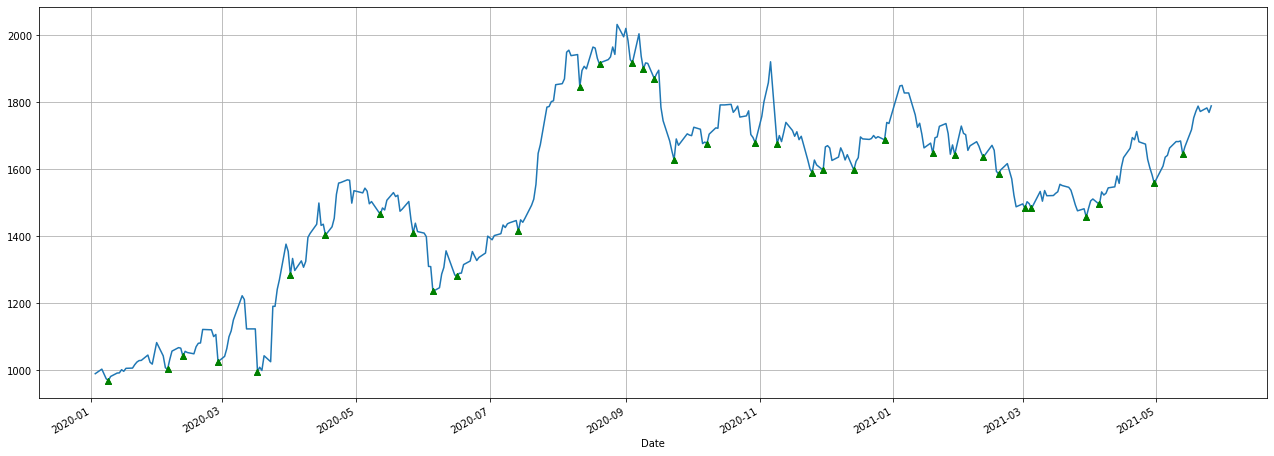

In [20]:
buy_signals = BUY(df, counter_lvl = 2)
buy_signals = buy_signals.set_index('Date')
#buy_signals

## Обьединение датафреймов

In [21]:
signals = sell_signals.append(buy_signals)
df_new = df

df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
df_new = df_new.fillna(0)
df_new.loc[df_new['Signal'] != 0][-10:]

,Open,High,Low,Close,Signal
Date,,,,,
2021-03-11,1522.599976,1555.000000,1516.599976,1536.000000,-1.0
2021-03-18,1538.800049,1557.500000,1538.800049,1554.599976,-1.0
2021-03-30,1481.599976,1485.500000,1445.500000,1456.699951,1.0
2021-04-05,1509.800049,1509.800049,1488.000000,1494.500000,1.0
2021-04-06,1498.599976,1539.400024,1496.300049,1532.000000,-1.0
2021-04-22,1700.000000,1730.000000,1691.199951,1712.199951,-1.0
2021-04-30,1580.000000,1588.000000,1552.400024,1558.000000,1.0
2021-05-12,1685.000000,1713.000000,1670.099976,1684.000000,-1.0
2021-05-13,1681.000000,1690.300049,1625.800049,1644.599976,1.0


## График торговли

### Long

In [22]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [23]:
stats

Start                     2020-01-03 00:00:00
End                       2021-05-26 00:00:00
Duration                    509 days 00:00:00
Exposure Time [%]                     60.1719
Equity Final [$]                  1.03564e+06
Equity Peak [$]                   1.03564e+06
Return [%]                            935.642
Buy & Hold Return [%]                 80.8046
Return (Ann.) [%]                     440.811
Volatility (Ann.) [%]                 152.169
Sharpe Ratio                          2.89684
Sortino Ratio                         48.0449
Calmar Ratio                            31.21
Max. Drawdown [%]                     -14.124
Avg. Drawdown [%]                    -1.46143
Max. Drawdown Duration       33 days 00:00:00
Avg. Drawdown Duration        5 days 00:00:00
# Trades                                   29
Win Rate [%]                          93.1034
Best Trade [%]                        52.0071
Worst Trade [%]                      -4.10412
Avg. Trade [%]                    

### Long & Short

In [24]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [25]:
stats

Start                     2020-01-03 00:00:00
End                       2021-05-26 00:00:00
Duration                    509 days 00:00:00
Exposure Time [%]                     64.1834
Equity Final [$]                   1.0177e+06
Equity Peak [$]                    1.0177e+06
Return [%]                            917.698
Buy & Hold Return [%]                 80.8046
Return (Ann.) [%]                     434.028
Volatility (Ann.) [%]                 134.821
Sharpe Ratio                          3.21928
Sortino Ratio                         82.2781
Calmar Ratio                          157.517
Max. Drawdown [%]                    -2.75543
Avg. Drawdown [%]                   -0.842881
Max. Drawdown Duration       14 days 00:00:00
Avg. Drawdown Duration        4 days 00:00:00
# Trades                                   34
Win Rate [%]                          97.0588
Best Trade [%]                        52.0071
Worst Trade [%]                     -0.576774
Avg. Trade [%]                    

In [26]:
# журнал торговли
trade_journal = stats._trades
trade_journal[-10:]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
24,-380,264,268,1729.056000,1643.300049,32587.261445,0.049597,2021-01-25,2021-01-29,4 days
25,-400,269,277,1721.586000,1635.000000,34634.400000,0.050294,2021-02-01,2021-02-11,10 days
26,-435,279,282,1664.316000,1585.300049,34371.938760,0.047477,2021-02-15,2021-02-18,3 days
27,-471,284,289,1609.934424,1484.199951,59220.936851,0.078099,2021-02-22,2021-03-02,8 days
28,549,292,295,1488.430000,1536.000000,26115.930000,0.031960,2021-03-05,2021-03-11,6 days
29,-545,300,308,1548.381576,1456.699951,49966.485359,0.059211,2021-03-18,2021-03-30,12 days
30,595,312,313,1500.478000,1532.000000,18755.590000,0.021008,2021-04-05,2021-04-06,1 days
31,-535,325,331,1705.351151,1558.000000,78832.865981,0.086405,2021-04-22,2021-04-30,8 days
32,-591,338,339,1677.264000,1644.599976,19304.438429,0.019475,2021-05-12,2021-05-13,1 days
33,-567,344,347,1780.947576,1769.099976,6717.589255,0.006652,2021-05-20,2021-05-25,5 days


# 1d: Подбор оптимального counter_lvl

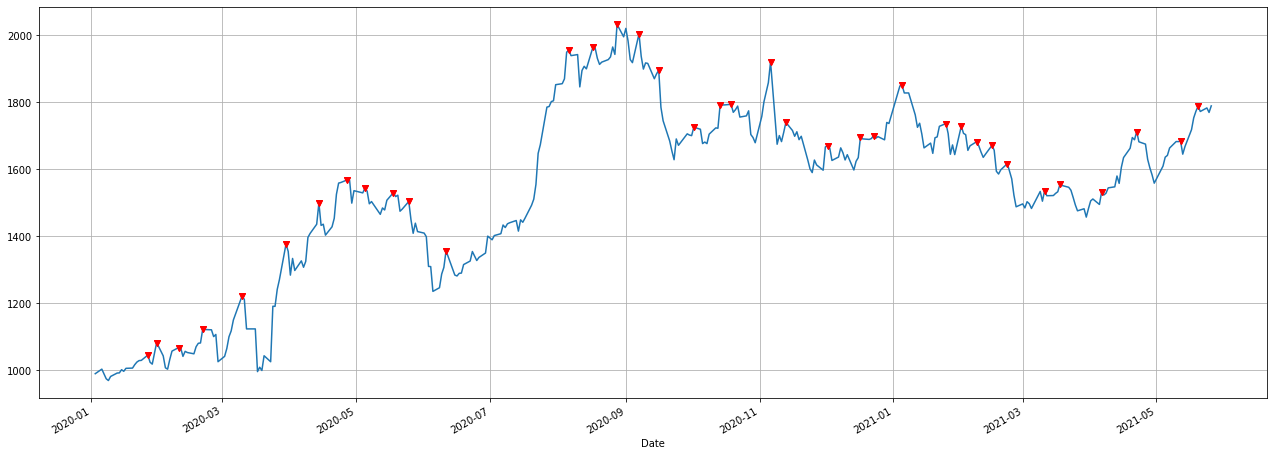

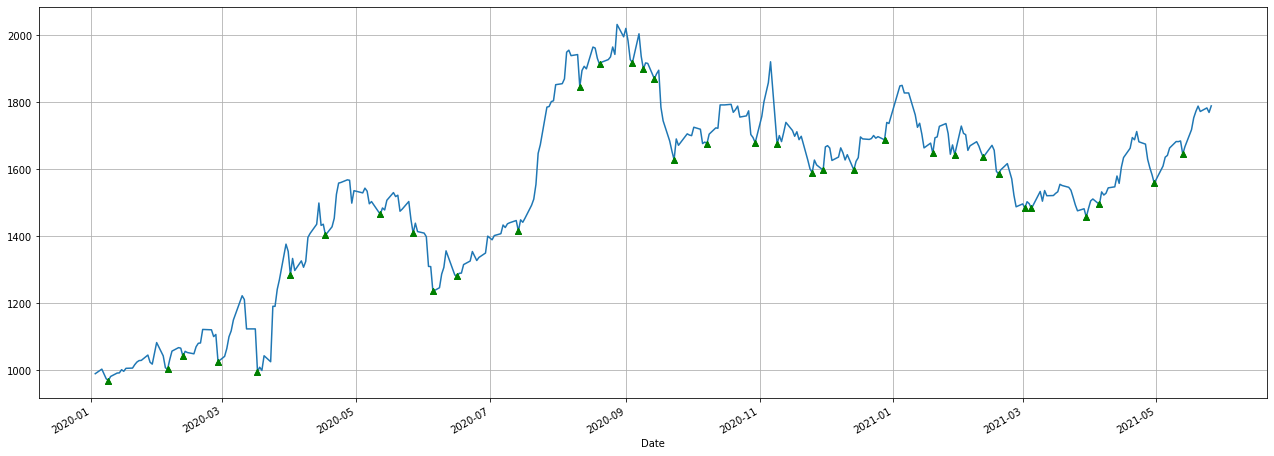

counter_lvl = 2 
 Return [%]                917.698
Buy & Hold Return [%]     80.8046
Return (Ann.) [%]         434.028
Volatility (Ann.) [%]     134.821
Sharpe Ratio              3.21928
Sortino Ratio             82.2781
Calmar Ratio              157.517
Max. Drawdown [%]        -2.75543
Avg. Drawdown [%]       -0.842881
dtype: object




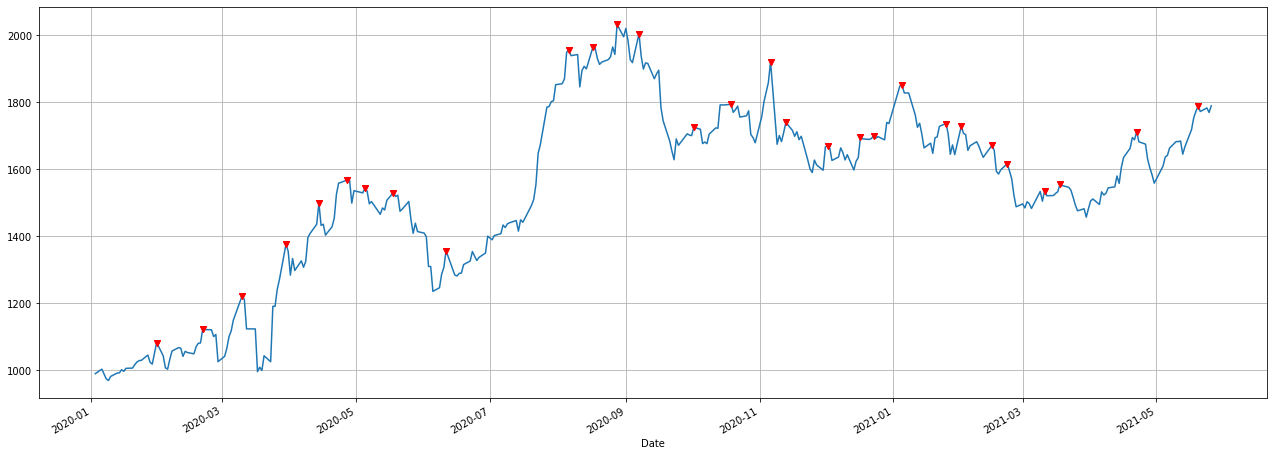

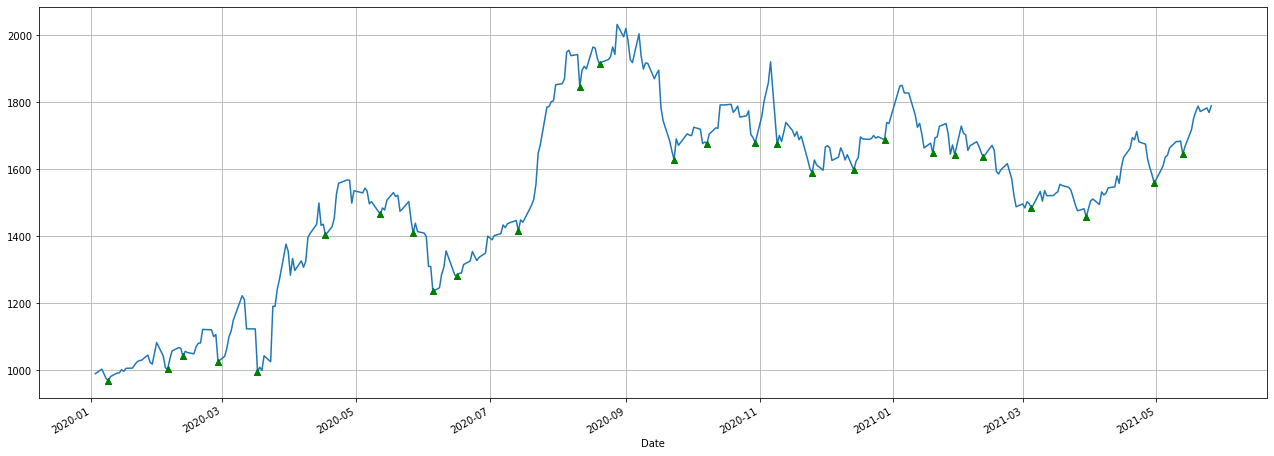

counter_lvl = 3 
 Return [%]               1136.37
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        514.611
Volatility (Ann.) [%]    173.792
Sharpe Ratio             2.96107
Sortino Ratio            84.1816
Calmar Ratio             186.713
Max. Drawdown [%]       -2.75615
Avg. Drawdown [%]       -1.00999
dtype: object




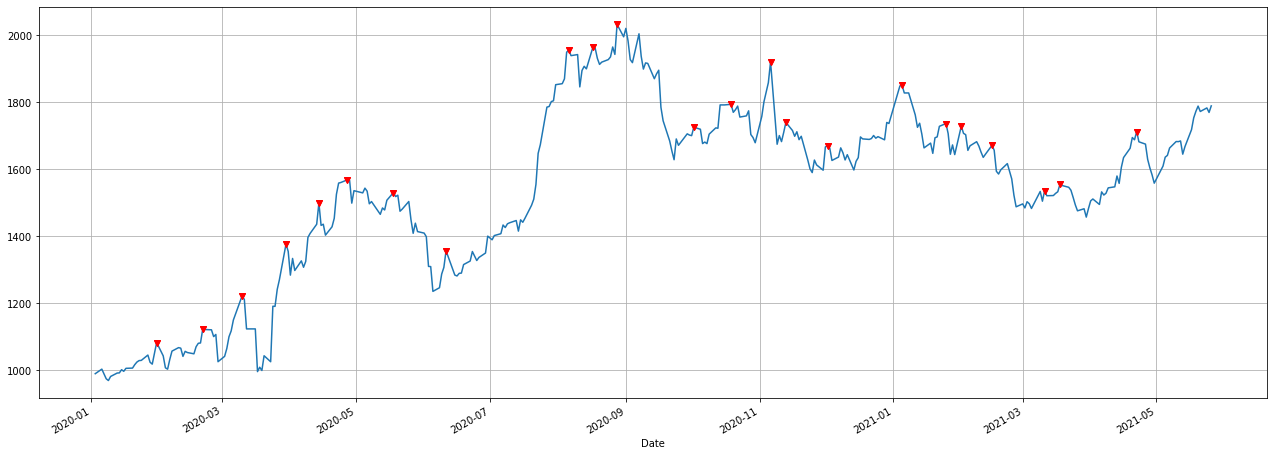

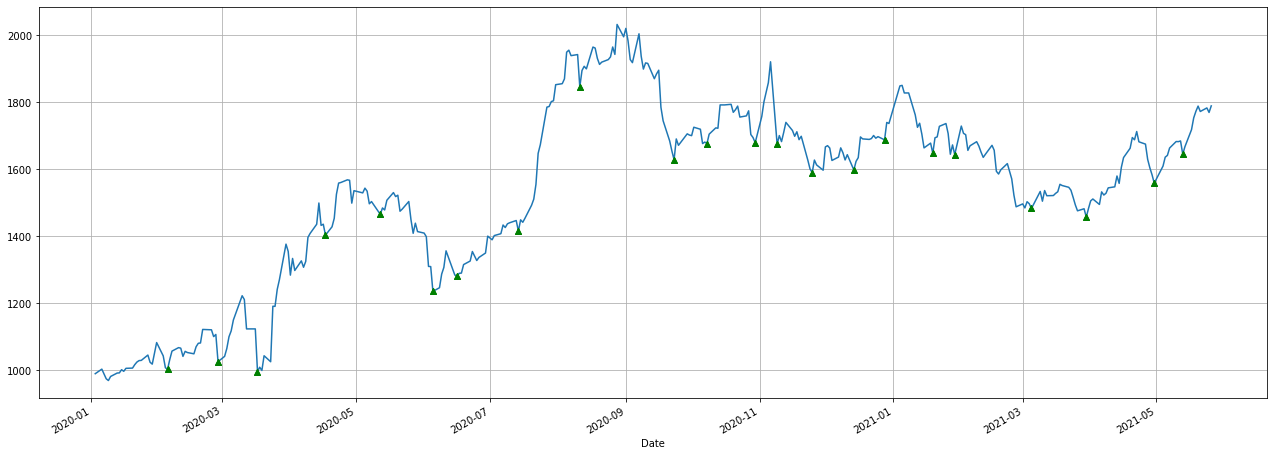

counter_lvl = 4 
 Return [%]               587.018
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        302.109
Volatility (Ann.) [%]    110.597
Sharpe Ratio             2.73163
Sortino Ratio            33.1067
Calmar Ratio             20.5937
Max. Drawdown [%]         -14.67
Avg. Drawdown [%]       -1.61314
dtype: object




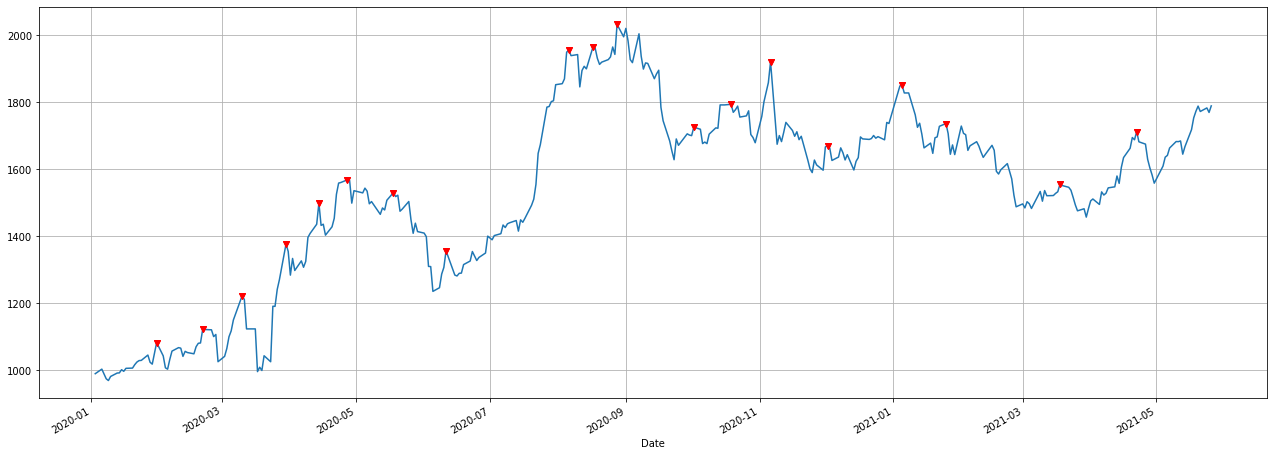

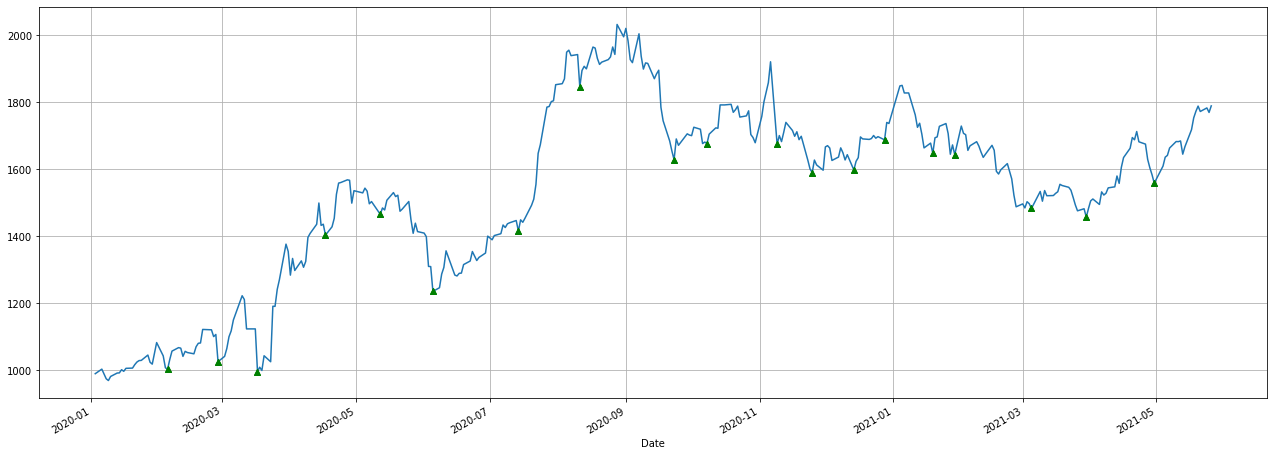

counter_lvl = 5 
 Return [%]               238.164
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        141.026
Volatility (Ann.) [%]    73.5342
Sharpe Ratio             1.91782
Sortino Ratio            10.0231
Calmar Ratio             9.61321
Max. Drawdown [%]         -14.67
Avg. Drawdown [%]        -3.3515
dtype: object




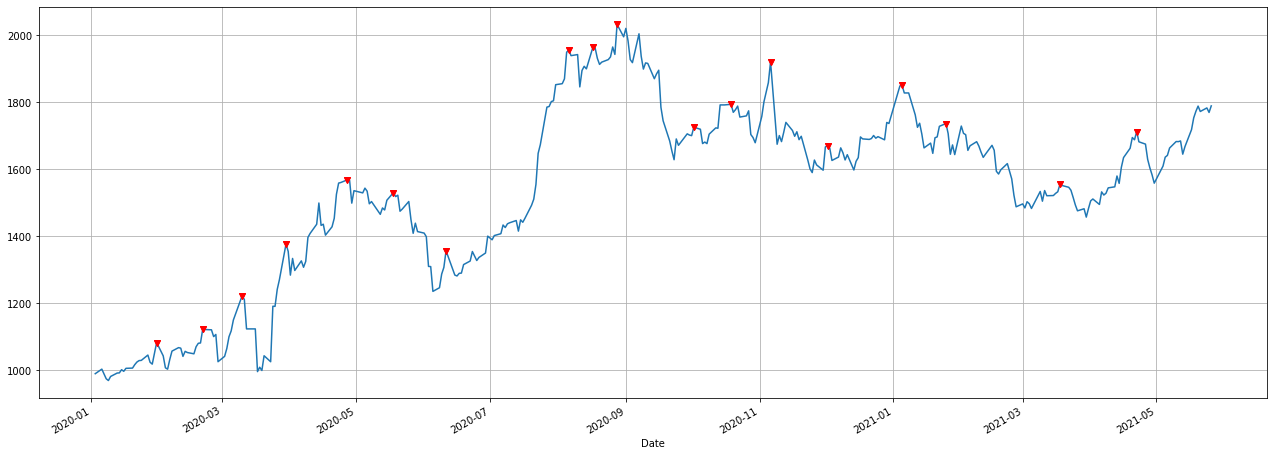

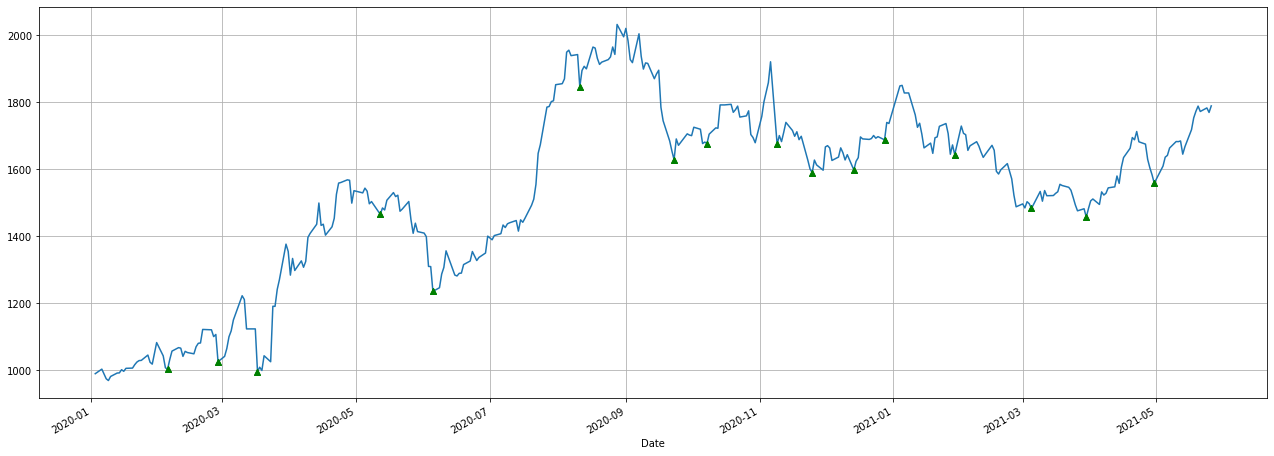

counter_lvl = 6 
 Return [%]               113.013
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        72.6355
Volatility (Ann.) [%]    63.4691
Sharpe Ratio             1.14442
Sortino Ratio            3.41558
Calmar Ratio             1.53076
Max. Drawdown [%]       -47.4506
Avg. Drawdown [%]       -6.78038
dtype: object




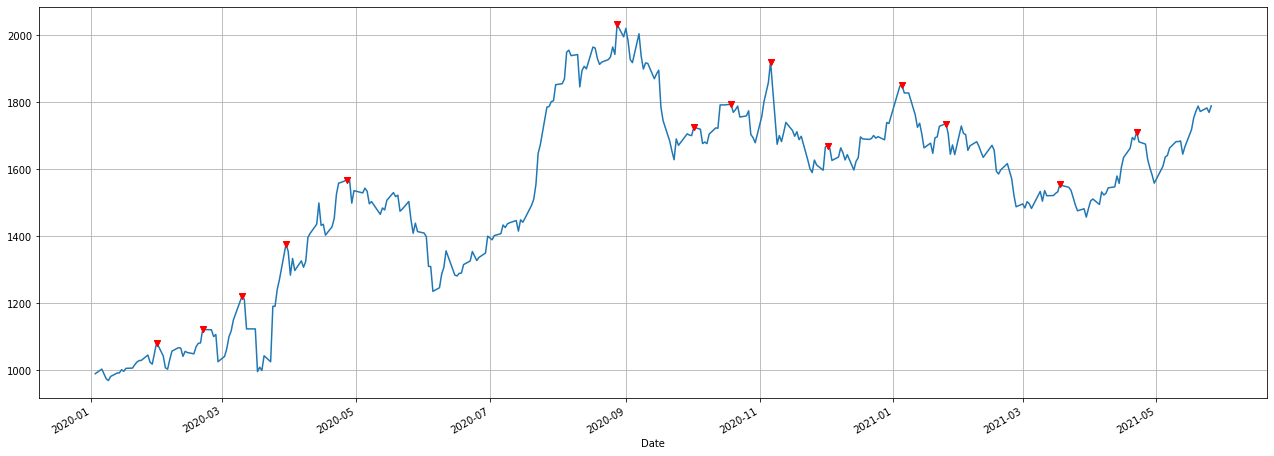

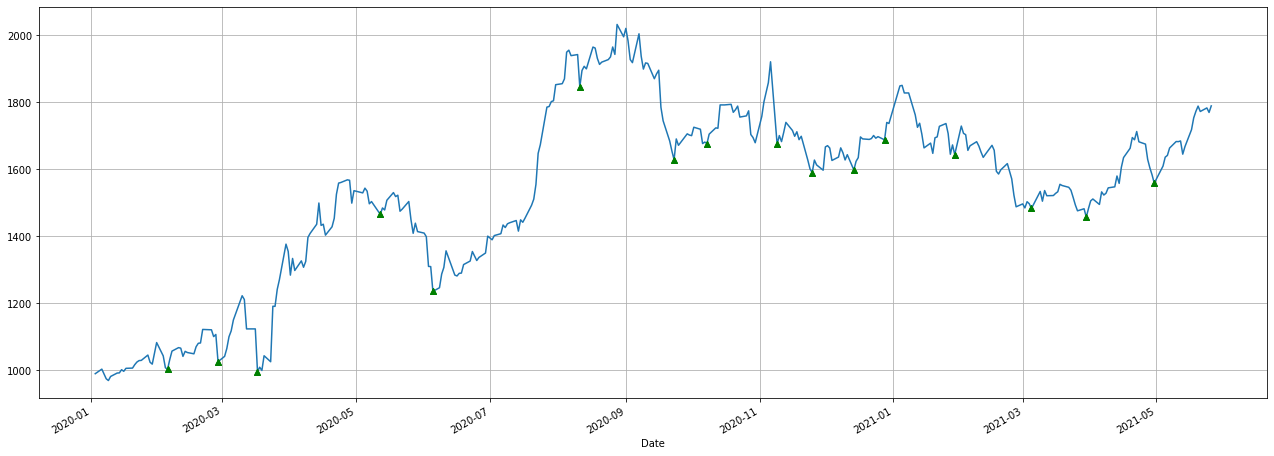

counter_lvl = 7 
 Return [%]               360.197
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        201.084
Volatility (Ann.) [%]    86.4636
Sharpe Ratio             2.32565
Sortino Ratio            16.0943
Calmar Ratio             10.3731
Max. Drawdown [%]       -19.3851
Avg. Drawdown [%]       -1.87665
dtype: object




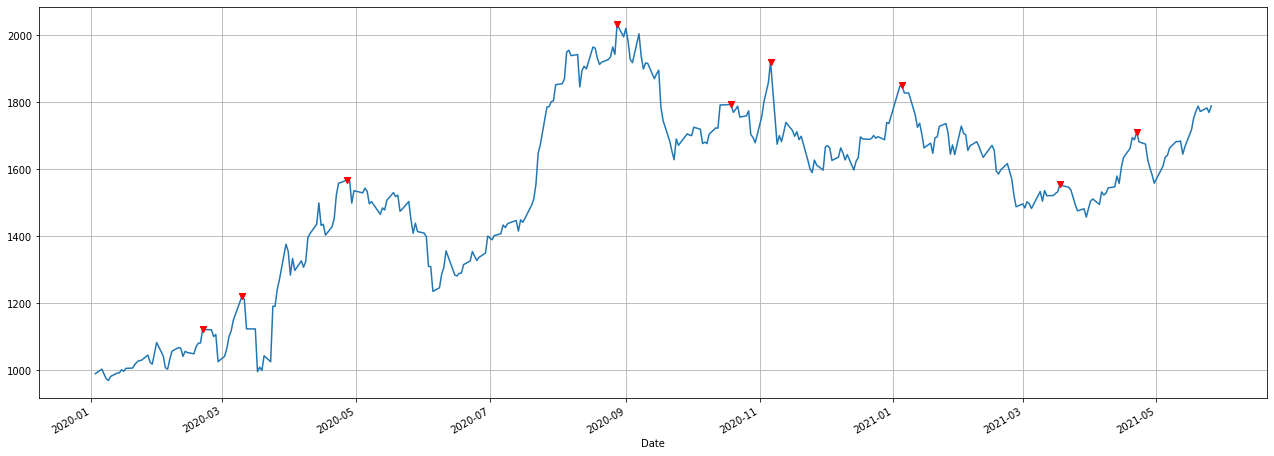

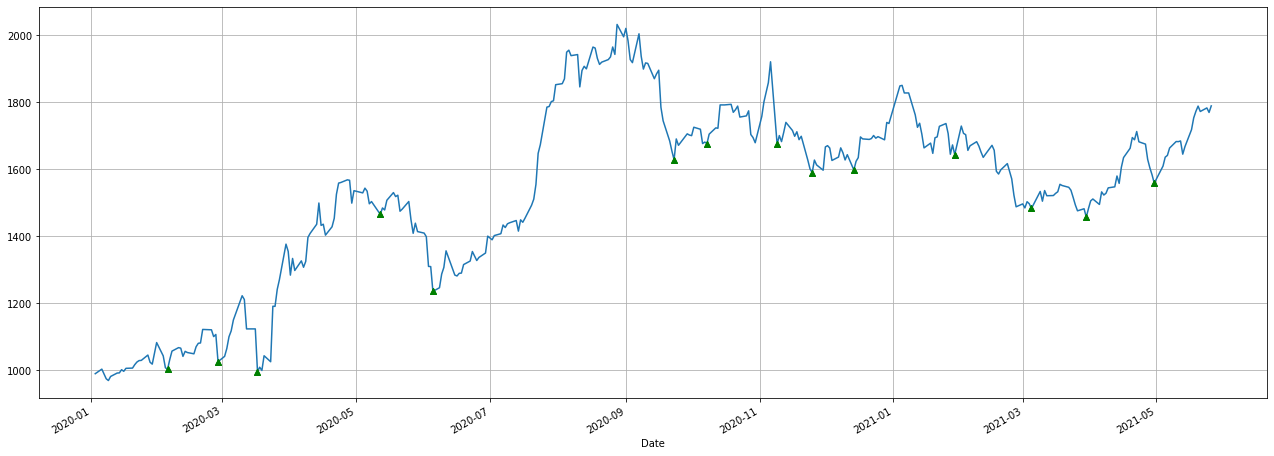

counter_lvl = 8 
 Return [%]               408.814
Buy & Hold Return [%]    80.8046
Return (Ann.) [%]        223.728
Volatility (Ann.) [%]    108.914
Sharpe Ratio             2.05418
Sortino Ratio            14.2766
Calmar Ratio             11.6766
Max. Drawdown [%]       -19.1603
Avg. Drawdown [%]       -3.20675
dtype: object



In [27]:
LnS_results = pd.DataFrame() # dataframe для записи результатов подбора оптимального окна counter_lvl

for i in range(2, 9):
    
    # Разметим Y
    sell_signals = SELL(df, counter_lvl = i)
    sell_signals = sell_signals.set_index('Date')
    buy_signals = BUY(df, counter_lvl = i)
    buy_signals = buy_signals.set_index('Date')
    
    # Обьединим датафреймы
    signals = sell_signals.append(buy_signals)
    df_new = df

    df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
    df_new = df_new.fillna(0)
    df_new.loc[df_new['Signal'] != 0]
    
    # Backtesting
    # Стратегия Long & Short (подключен класс стратегии LnS)
    bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
    stats = bt.run()
    
    print('counter_lvl =', i, '\n', stats[6:15])
    print('='*100)
    print()
    
    line = pd.DataFrame({'counter_lvl':[i],
                         'Trades':[stats[17]],
                         'Return [%]':[stats[6]],
                         'Buy & Hold Return [%]':[stats[7]],
                         'Return (Ann.) [%]':[stats[8]],
                         'Sharpe Ratio':[stats[10]],
                         'Sortino Ratio':[stats[11]],
                         'Calmar Ratio':[stats[12]],
                         'Max. Drawdown [%]':[stats[13]],
                         'Avg. Drawdown [%]]':[stats[14]],
                         'Win Rate [%]':[stats[18]]
                        })
    LnS_results = LnS_results.append(line, ignore_index=True)
    

In [28]:
LnS_results

,counter_lvl,Trades,Return [%],Buy & Hold Return [%],Return (Ann.) [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max. Drawdown [%],Avg. Drawdown [%]],Win Rate [%]
0,2,34,917.697662,80.804607,434.028302,3.219282,82.278105,157.517431,-2.755430,-0.842881,97.058824
1,3,25,1136.370322,80.804607,514.610697,2.961065,84.181619,186.713301,-2.756154,-1.009991,100.000000
2,4,22,587.018122,80.804607,302.109002,2.731629,33.106721,20.593682,-14.669985,-1.613136,95.454545
3,5,17,238.163823,80.804607,141.025589,1.917824,10.023148,9.613206,-14.669985,-3.351505,82.352941
4,6,15,113.013075,80.804607,72.635466,1.144423,3.415582,1.530759,-47.450631,-6.780376,86.666667
5,7,14,360.196887,80.804607,201.083617,2.325645,16.094340,10.373108,-19.385089,-1.876651,92.857143
6,8,10,408.813816,80.804607,223.727849,2.054178,14.276598,11.676626,-19.160316,-3.206755,90.000000


In [29]:
df_new

,Open,High,Low,Close,Signal
Date,,,,,
2020-01-03,978.400024,989.299988,967.099976,989.299988,0.0
2020-01-06,995.599976,1004.700012,993.299988,1002.900024,0.0
2020-01-08,1008.799988,1016.099976,970.400024,974.099976,0.0
2020-01-09,972.799988,972.799988,943.000000,968.900024,0.0
2020-01-10,968.900024,989.000000,955.000000,981.000000,0.0
...,...,...,...,...,...
2021-05-20,1757.000000,1794.000000,1754.900024,1788.099976,0.0
2021-05-21,1793.000000,1801.500000,1764.599976,1772.000000,0.0
2021-05-24,1788.800049,1798.000000,1777.699951,1782.599976,0.0
